In [46]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as ts

mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['axes.grid'] = False

In [47]:
from google.colab import drive
drive.mount('/content/drive')
Train_dataset = pd.read_excel("/content/drive/MyDrive/Colab_files/Train_20201207.xlsx")
Train_dataset.to_csv('train_20201207.csv')
Train_dataset.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Time,Date,NEM Demand(Actual)
0,00:30,2020-12-07,5484.1
1,01:00,2020-12-07,5366.4
2,01:30,2020-12-07,5282.0
3,02:00,2020-12-07,5201.6
4,02:30,2020-12-07,5155.9


In [48]:
Train_dataset ['DateTime'] = Train_dataset['Date'].astype(str) + " "+ Train_dataset['Time'].astype(str)
Train_dataset.tail()
Train_dataset ['Date'] = pd.to_datetime(Train_dataset['Date'], format = '%Y-%m-%d')
Train_dataset.tail()
Train_dataset ['DateTime'] = pd.to_datetime(Train_dataset['DateTime'], format = '%Y-%m-%d %H:%M:%S')
Train_dataset.tail()


,Time,Date,NEM Demand(Actual),DateTime
667,22:00,2020-12-20,5901.6,2020-12-20 22:00:00
668,22:30,2020-12-20,5765.2,2020-12-20 22:30:00
669,23:00,2020-12-20,5683.3,2020-12-20 23:00:00
670,23:30,2020-12-20,5563.0,2020-12-20 23:30:00
671,00:00,2020-12-20,5470.2,2020-12-20 00:00:00


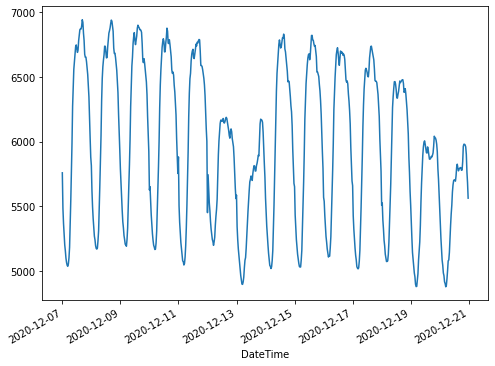

In [49]:
#Plot the dataset
plot_features = Train_dataset['NEM Demand(Actual)']
plot_features.index = Train_dataset['DateTime']
_= plot_features.plot(subplots = True)


In [50]:
Train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
NEM Demand(Actual),672.0,5971.323661,609.974163,4877.7,5383.2,5980.1,6554.125,6942.8


In [51]:
#We do not want to loose original dataset
Train_dataset_actual = Train_dataset

In [72]:
n = len(Train_dataset_actual)
train_df = Train_dataset_actual[0:int(n*0.7)]
print(train_df)
val_df = Train_dataset_actual[int(n*0.7):int(n*0.9)]
print(val_df)
test_df = Train_dataset_actual[int(n*0.9):]
print(test_df)

num_of_features = Train_dataset_actual.shape[1]  # Including DateTime


      Time       Date  NEM Demand(Actual)            DateTime
0    00:30 2020-12-07              5484.1 2020-12-07 00:30:00
1    01:00 2020-12-07              5366.4 2020-12-07 01:00:00
2    01:30 2020-12-07              5282.0 2020-12-07 01:30:00
3    02:00 2020-12-07              5201.6 2020-12-07 02:00:00
4    02:30 2020-12-07              5155.9 2020-12-07 02:30:00
..     ...        ...                 ...                 ...
465  17:00 2020-12-16              6667.5 2020-12-16 17:00:00
466  17:30 2020-12-16              6636.3 2020-12-16 17:30:00
467  18:00 2020-12-16              6556.6 2020-12-16 18:00:00
468  18:30 2020-12-16              6477.8 2020-12-16 18:30:00
469  19:00 2020-12-16              6460.7 2020-12-16 19:00:00

[470 rows x 4 columns]
      Time       Date  NEM Demand(Actual)            DateTime
470  19:30 2020-12-16              6469.8 2020-12-16 19:30:00
471  20:00 2020-12-16              6446.3 2020-12-16 20:00:00
472  20:30 2020-12-16              6370.0 2020

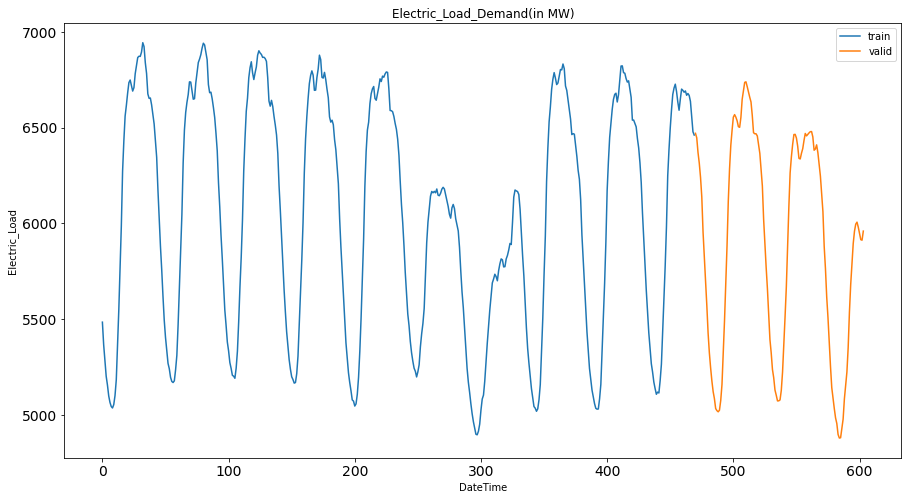

RangeIndex(start=0, stop=470, step=1)

In [53]:
train_df['NEM Demand(Actual)'].plot(figsize=(15,8), title = 'Electric_Load_Demand(in MW)', fontsize = 14, label = 'train')
val_df['NEM Demand(Actual)'].plot(figsize=(15,8),title = 'Electric_Load_Demand(in MW)', fontsize = 14, label = 'valid')
plt.xlabel('DateTime')
plt.ylabel('Electric_Load')
plt.legend(loc ='best')
plt.show()
train_df.index


1) Naive Approach Method of Prediction

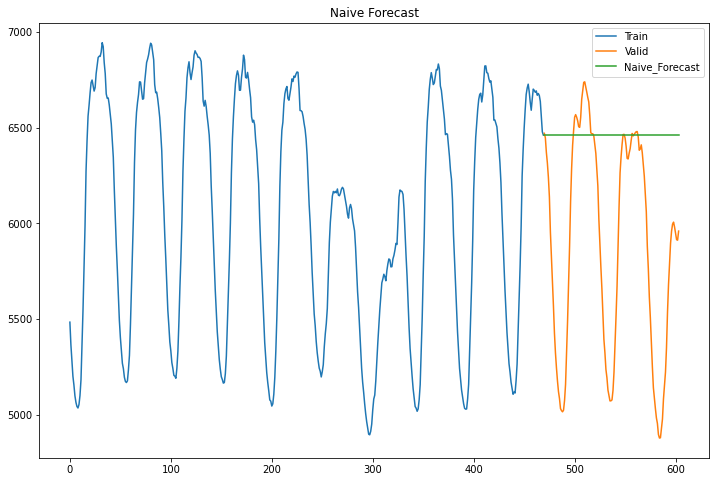

Root Mean Squared Error : 816.7025369622631


In [54]:
dd = pd.DataFrame(train_df['NEM Demand(Actual)']) 
Naive_df = val_df.copy()
Naive_df['naive_approach'] = dd['NEM Demand(Actual)'].iloc[-1]
#print(Naive_df['naive_approach'].head())                       #Naive_forecast is 6419.3 MW
plt.figure(figsize = (12,8))
plt.plot(train_df.index, train_df['NEM Demand(Actual)'], label ='Train')
plt.plot(val_df.index,val_df['NEM Demand(Actual)'], label = 'Valid')
plt.plot(Naive_df.index, Naive_df['naive_approach'], label ='Naive_Forecast')
plt.legend(loc = 'best')
plt.title('Naive Forecast')
plt.show()

#We will check RMSE on validation data sets
from sklearn.metrics import mean_squared_error
rms = np.sqrt(mean_squared_error(Naive_df['naive_approach'],val_df['NEM Demand(Actual)']))
print('Root Mean Squared Error :',rms)


2) We will make prediction using 'Moving Average' method.

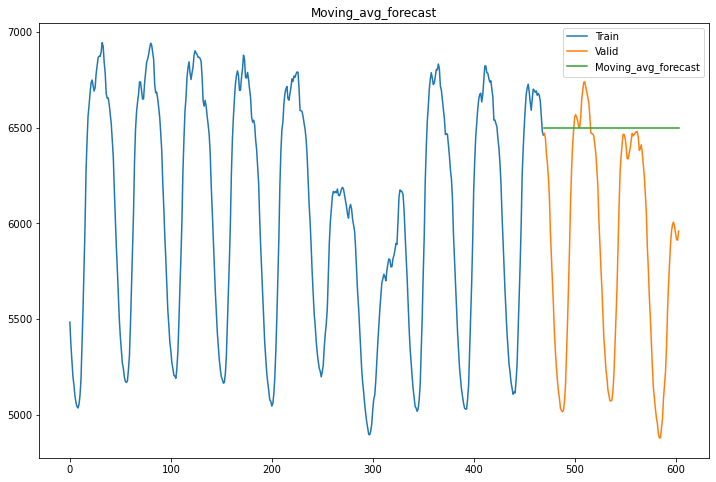

Root_mean_squared_error: 843.7151111440351


In [55]:
ma_avg = val_df.copy()
ma_avg['moving_avg_forecast'] = train_df['NEM Demand(Actual)'].rolling(3).mean().iloc[-1]

plt.figure(figsize = (12,8))
plt.plot(train_df.index, train_df['NEM Demand(Actual)'], label ='Train')
plt.plot(val_df.index,val_df['NEM Demand(Actual)'], label = 'Valid')
plt.plot(ma_avg.index, ma_avg['moving_avg_forecast'], label ='Moving_avg_forecast')
plt.legend(loc = 'best')
plt.title('Moving_avg_forecast')
plt.show()

rms_ma = np.sqrt(mean_squared_error(ma_avg['moving_avg_forecast'],val_df['NEM Demand(Actual)']))
print('Root_mean_squared_error:',rms_ma)

3) Now we will make prediction using 'Simple Exponential Smoothing'

821.8455358633266


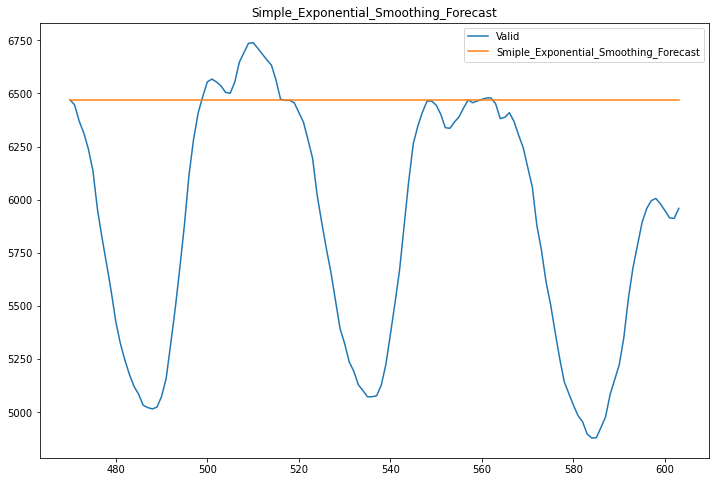

In [56]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
sme_avg = val_df.copy()
Fit = SimpleExpSmoothing(np.asarray(train_df['NEM Demand(Actual)'])).fit( smoothing_level = 0.8, optimized = False)
sme_avg['SES'] = Fit.forecast(len(val_df))
rms_ses = (np.sqrt(mean_squared_error(sme_avg['SES'],val_df['NEM Demand(Actual)'])))
print(rms_ses)

plt.figure(figsize = (12,8))
#plt.plot(train_df.index, train_df['NEM Demand(Actual)'], label ='Train')
plt.plot(val_df.index,val_df['NEM Demand(Actual)'], label = 'Valid')
plt.plot(sme_avg.index, sme_avg['SES'], label ='Smiple_Exponential_Smoothing_Forecast')
plt.legend(loc = 'best')
plt.title('Simple_Exponential_Smoothing_Forecast')
plt.show()


4) Holt's Linear Trend Model

                      Time       Date  NEM Demand(Actual)
DateTime                                                 
2020-12-07 00:30:00  00:30 2020-12-07              5484.1
2020-12-07 01:00:00  01:00 2020-12-07              5366.4
2020-12-07 01:30:00  01:30 2020-12-07              5282.0
2020-12-07 02:00:00  02:00 2020-12-07              5201.6
2020-12-07 02:30:00  02:30 2020-12-07              5155.9


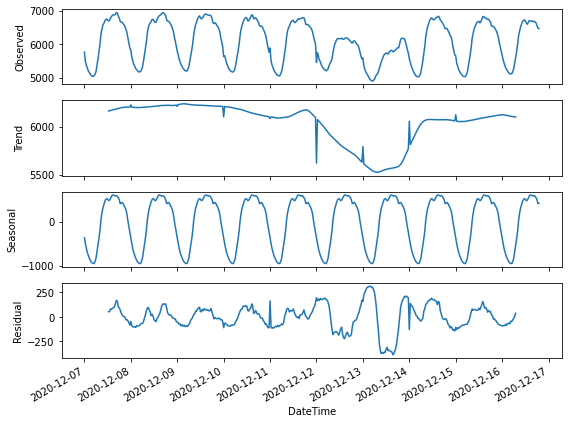

In [57]:
train_df1 = train_df
train_df1 = train_df1.set_index('DateTime')
train_df1 = train_df1.fillna(method='bfill').fillna(method='ffill')

decompfreq = ( (24*60)//30)
print(train_df1.head())
import statsmodels.api as sm
sm.tsa.seasonal_decompose(train_df1['NEM Demand(Actual)'], freq = decompfreq).plot()
result = sm.tsa.stattools.adfuller(train_df1['NEM Demand(Actual)'])
plt.show()

Root_mean_squared_error : 636.5710753876567


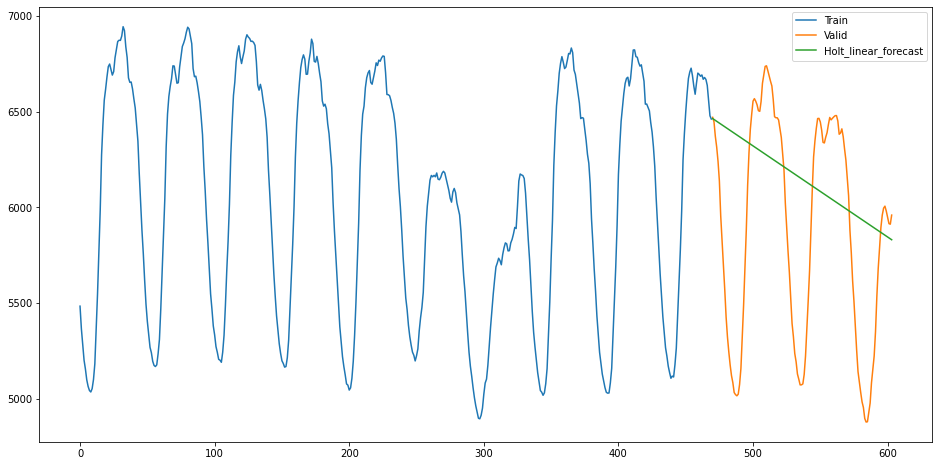

In [58]:
HLT_avg = val_df.copy()
fit_holt = Holt(np.asarray(train_df['NEM Demand(Actual)'])).fit(smoothing_level = 0.8, smoothing_slope = 0.1 )
HLT_avg['holt_linear_forecast'] = fit_holt.forecast(len(val_df))
HLT_avg.tail()

rmse_holt_linear = np.sqrt(mean_squared_error(val_df['NEM Demand(Actual)'],HLT_avg['holt_linear_forecast']))
print('Root_mean_squared_error :',rmse_holt_linear)

plt.figure(figsize = (16,8))
plt.plot(train_df.index,train_df['NEM Demand(Actual)'],label = 'Train')
plt.plot(val_df.index,val_df['NEM Demand(Actual)'],label ='Valid')
plt.plot(HLT_avg.index, HLT_avg['holt_linear_forecast'], label = 'Holt_linear_forecast')
plt.legend(loc ='best')
plt.show()


5) Holt's Winter Model

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


209.24476184728206


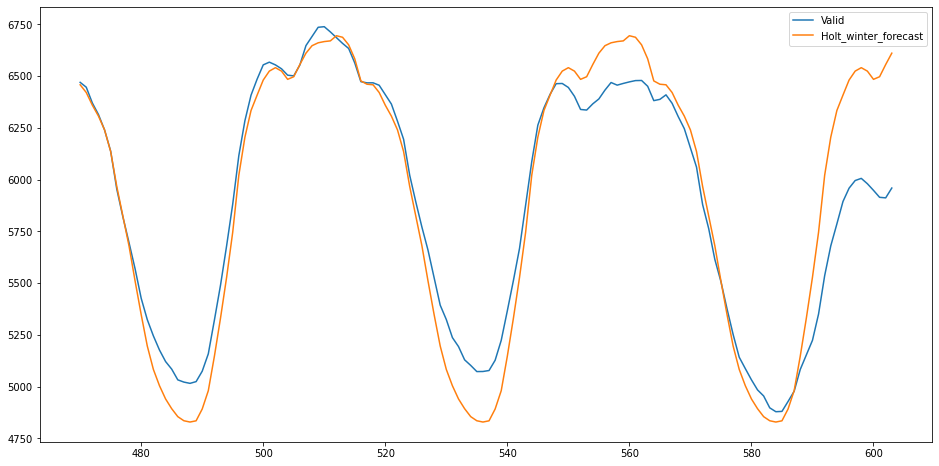

In [59]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
holt_winter_avg = val_df.copy()
holt_winter_fit = ExponentialSmoothing(np.asarray(train_df['NEM Demand(Actual)']), seasonal = "add",seasonal_periods=48).fit()
holt_winter_avg['holt_winter_forecast'] = holt_winter_fit.forecast(len(val_df))
holt_winter_avg.head()

rmse_holt_winter = np.sqrt(mean_squared_error(val_df['NEM Demand(Actual)'],holt_winter_avg['holt_winter_forecast']))
print(rmse_holt_winter)

plt.figure(figsize = (16,8))
#plt.plot(train_df.index,train_df['NEM Demand(Actual)'],label = 'Train')
plt.plot(val_df.index,val_df['NEM Demand(Actual)'],label ='Valid')
plt.plot(holt_winter_avg.index, holt_winter_avg['holt_winter_forecast'], label = 'Holt_winter_forecast')
plt.legend(loc ='best')
plt.show()


In [60]:
prediction = test_df.copy()
prediction['holt_winter_prediction'] = holt_winter_fit.forecast(len(test_df))
prediction.head()
rms = np.sqrt(mean_squared_error(test_df['NEM Demand(Actual)'],prediction['holt_winter_prediction']))
print('Root Mean squared error for Test Dataset:',rms)


Root Mean squared error for Test Dataset: 882.4286048837756


6) Implement ARIMA Model

First Calculate the results of Dickey-Fuller Test

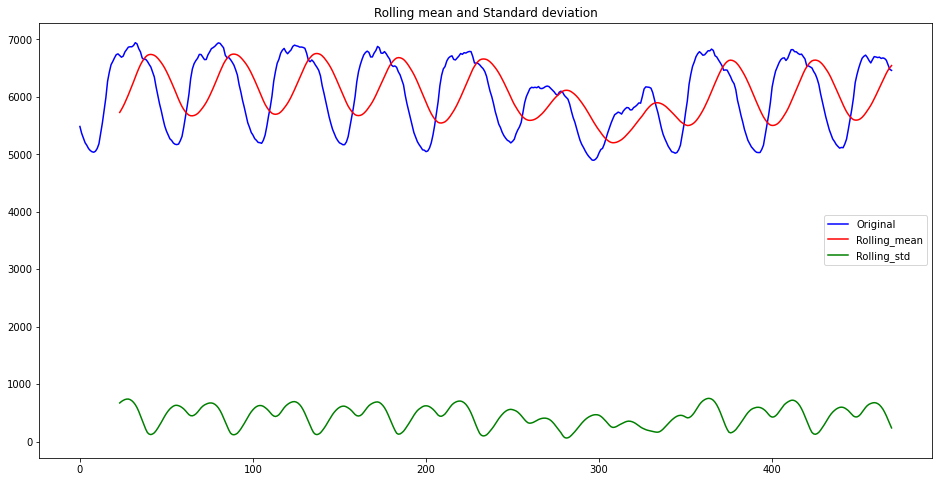

Results of Dickey_Fuller Test:
Test Statistic            -5.708055e+00
p-value                    7.409096e-07
#Lags_used                 1.800000e+01
No_of_observations_used    4.510000e+02
Critical Value(1%)        -3.444933e+00
Critical Value(5%)        -2.867970e+00
Critical Value(10%)       -2.570195e+00
dtype: float64


In [61]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

  # Determine rolling statistics
  
    rolmean = timeseries.rolling(24).mean()
    rolstd = timeseries.rolling(24).std()
    
    #Plot_rolling_statistics
    orig = plt.plot(timeseries, color = 'blue', label = 'Original')
    mean = plt.plot(rolmean, color = 'red', label = 'Rolling_mean')
    std = plt.plot(rolstd, color = 'green', label = 'Rolling_std')
    plt.legend(loc = 'best')
    plt.title("Rolling mean and Standard deviation")
    plt.show(block = False)
    
    #Perform Dickey-Fuller Test:
    print('Results of Dickey_Fuller Test:')
    dftest = adfuller (timeseries, autolag = 'AIC')
    dfoutput = pd.Series (dftest[0:4], index = ['Test Statistic', 'p-value', '#Lags_used', 'No_of_observations_used'])
    
    for key,value in dftest[4].items():
        dfoutput['Critical Value(%s)'%key] = value
    print(dfoutput)
    
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 16,8
test_stationarity(train_df['NEM Demand(Actual)'])


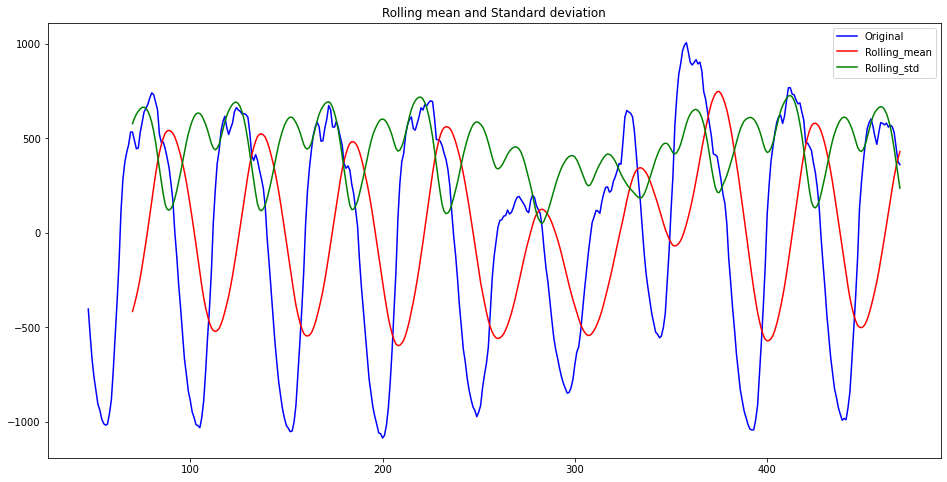

Results of Dickey_Fuller Test:
Test Statistic            -6.649722e+00
p-value                    5.157398e-09
#Lags_used                 1.800000e+01
No_of_observations_used    4.040000e+02
Critical Value(1%)        -3.446640e+00
Critical Value(5%)        -2.868721e+00
Critical Value(10%)       -2.570595e+00
dtype: float64
0      NaN
1   -117.7
2    -84.4
3    -80.4
4    -45.7
Name: NEM Demand(Actual), dtype: float64


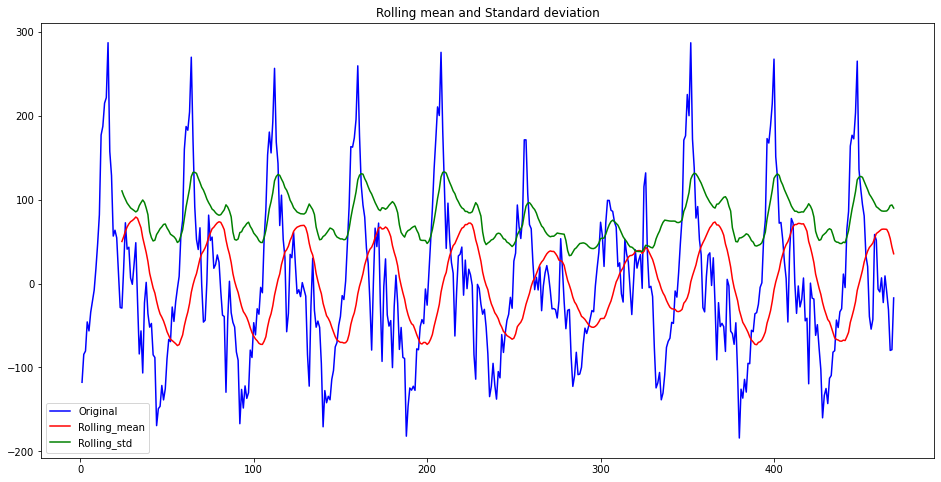

Results of Dickey_Fuller Test:
Test Statistic            -8.112039e+00
p-value                    1.218520e-12
#Lags_used                 1.400000e+01
No_of_observations_used    4.540000e+02
Critical Value(1%)        -3.444836e+00
Critical Value(5%)        -2.867927e+00
Critical Value(10%)       -2.570172e+00
dtype: float64


In [62]:
train_df2 = train_df
moving_avg = train_df2['NEM Demand(Actual)'].rolling(48).mean()
train_df2_moving_diff = train_df2['NEM Demand(Actual)'] - moving_avg
train_df2_moving_diff.dropna(inplace = True)
test_stationarity(train_df2_moving_diff)

#Differecing technique to eliminate trend and stablize the mean of time series
train_df2_diff = train_df2 ['NEM Demand(Actual)'] - (train_df2['NEM Demand(Actual)'].shift(1))
print(train_df2_diff.head())
test_stationarity(train_df2_diff.dropna())

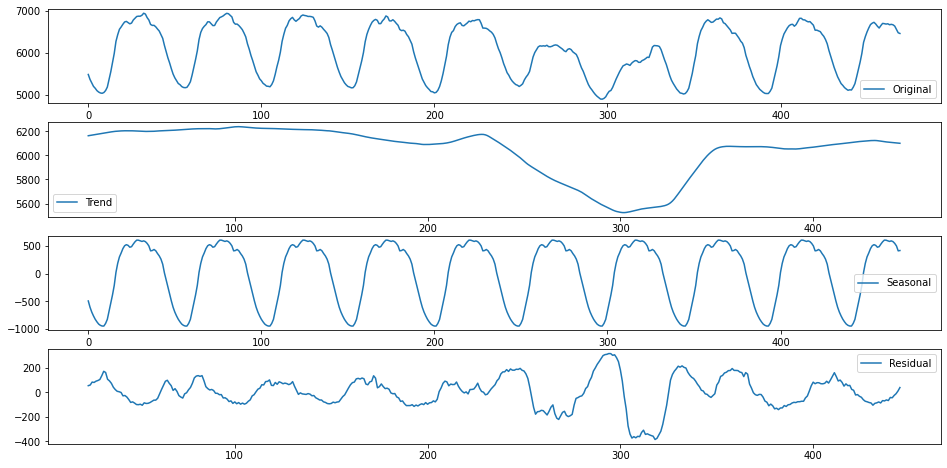

In [63]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(train_df['NEM Demand(Actual)'], model = 'additive', freq = 48)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(train_df['NEM Demand(Actual)'], label = 'Original')
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(trend, label ='Trend')
plt.legend(loc ='best')
plt.subplot(413)
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc = 'best')
plt.subplot(414)
plt.plot(residual, label = 'Residual')
plt.legend(loc = 'best')
plt.tight_layout
plt.show()

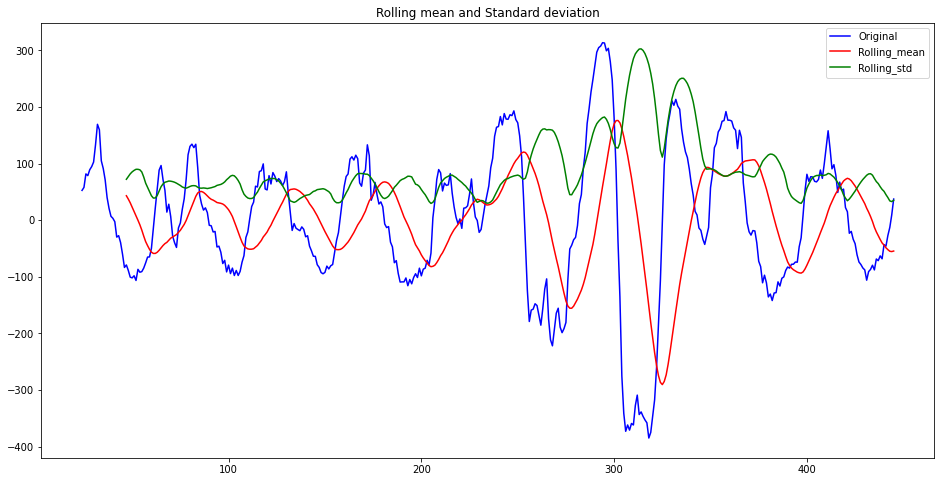

Results of Dickey_Fuller Test:
Test Statistic            -7.294764e+00
p-value                    1.387234e-10
#Lags_used                 1.200000e+01
No_of_observations_used    4.090000e+02
Critical Value(1%)        -3.446440e+00
Critical Value(5%)        -2.868633e+00
Critical Value(10%)       -2.570548e+00
dtype: float64


In [64]:
train_df_decompose = pd.DataFrame(residual)
train_df_decompose.dropna(inplace=True)
test_stationarity(train_df_decompose['NEM Demand(Actual)'])


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


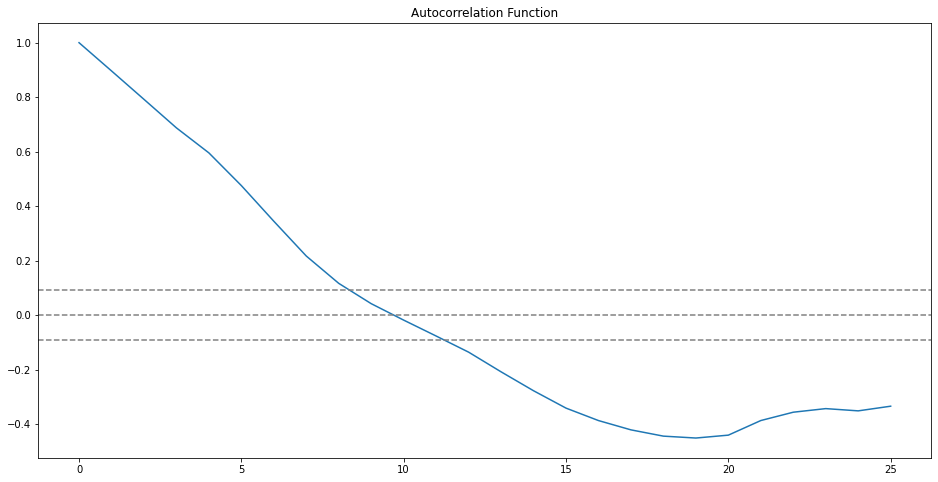

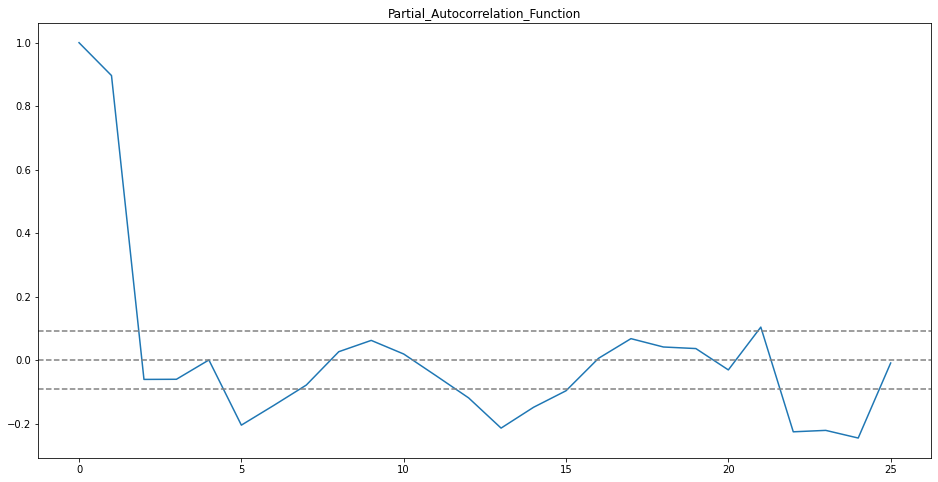

In [65]:
from statsmodels.tsa.stattools import acf, pacf

# Calculate ACF and PACF
lag_acf = acf(train_df2_diff.dropna(), nlags = 25)
lag_pacf = pacf(train_df2_diff.dropna(), nlags = 25, method = 'ols')

# ACF and PACF plot
plt.plot(lag_acf)
plt.axhline(y = 0, linestyle = '--', color = 'grey')
plt.axhline(y = -1.96/np.sqrt(len(train_df2_diff.dropna())), linestyle = '--', color = 'grey')
plt.axhline(y = 1.96/ np.sqrt(len(train_df2_diff.dropna())),linestyle = '--', color = 'grey')
plt.title("Autocorrelation Function")
plt.show()


plt.plot(lag_pacf)
plt.axhline(y = 0, linestyle = '--', color = 'grey')
plt.axhline(y = -1.96/np.sqrt(len(train_df2_diff.dropna())), linestyle = '--', color = 'grey')
plt.axhline(y = 1.96/ np.sqrt(len(train_df2_diff.dropna())),linestyle = '--', color = 'grey')
plt.title("Partial_Autocorrelation_Function")
plt.show()



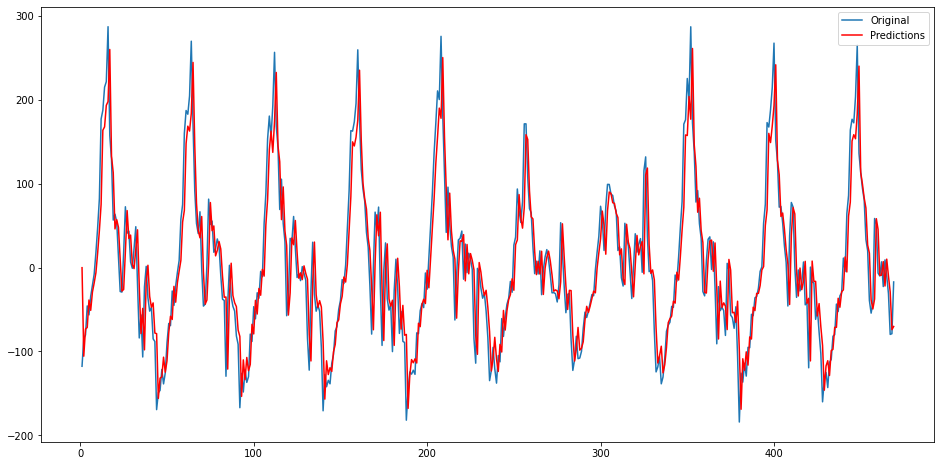

                              ARIMA Model Results                               
Dep. Variable:     D.NEM Demand(Actual)   No. Observations:                  469
Model:                   ARIMA(2, 1, 0)   Log Likelihood               -2405.020
Method:                         css-mle   S.D. of innovations             40.743
Date:                  Tue, 05 Jan 2021   AIC                           4818.040
Time:                          11:39:27   BIC                           4834.642
Sample:                               1   HQIC                          4824.572
                                                                                
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.0778     17.080     -0.005      0.996     -33.554      33.399
ar.L1.D.NEM Demand(Actual)     0.9524      0.046     20.641      0.

In [66]:
from statsmodels.tsa.arima_model import ARIMA 
# Train the model   # AR Model
model = ARIMA((train_df['NEM Demand(Actual)']), order = (2,1,0))
results_AR = model.fit(disp = -1)

plt.plot(train_df2_diff,label ='Original' )
plt.plot(results_AR.fittedvalues, color='red', label = 'Predictions')
plt.legend(loc ='best')
plt.show()
print(results_AR.summary())

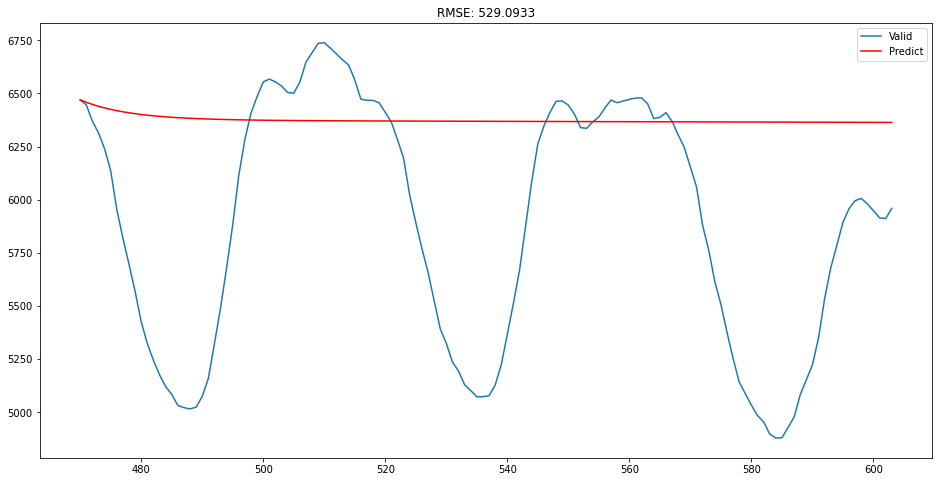

In [67]:
#Predict the results using AR_model
AR_predict = results_AR.predict(start = val_df.index[0], end = val_df.index[-1])
AR_predict = AR_predict.cumsum().shift().fillna(0)
AR_predict1 = pd.Series(np.ones(val_df.shape[0]) *(val_df['NEM Demand(Actual)'].iloc[0]), index = val_df.index)
AR_predict1 = AR_predict1.add(AR_predict, fill_value = 0)
AR_predict = AR_predict1

plt.plot(val_df['NEM Demand(Actual)'], label='Valid' )
plt.plot(AR_predict, color = 'red', label ="Predict")
plt.legend(loc = 'best')
plt.title('RMSE: %.4f'%(np.sqrt(np.dot(AR_predict, val_df['NEM Demand(Actual)']))/val_df.shape[0]))
plt.show()


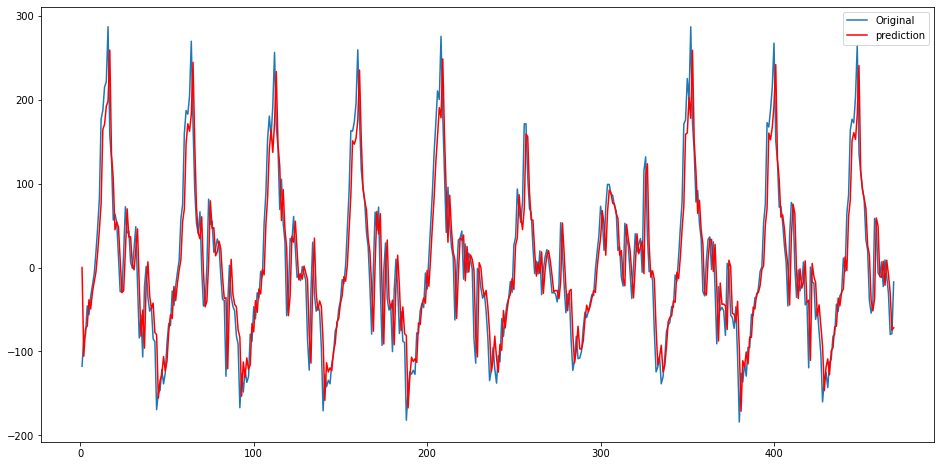

                              ARIMA Model Results                               
Dep. Variable:     D.NEM Demand(Actual)   No. Observations:                  469
Model:                   ARIMA(1, 1, 2)   Log Likelihood               -2404.385
Method:                         css-mle   S.D. of innovations             40.687
Date:                  Tue, 05 Jan 2021   AIC                           4818.770
Time:                          11:39:27   BIC                           4839.523
Sample:                               1   HQIC                          4826.936
                                                                                
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.1261     16.465      0.008      0.994     -32.144      32.396
ar.L1.D.NEM Demand(Actual)     0.8723      0.028     31.075      0.

In [68]:
# MA model

#Train the model
model = ARIMA((train_df['NEM Demand(Actual)']), order = (1,1,2))
results_MA = model.fit()

plt.plot(train_df2_diff.dropna(), label = 'Original')
plt.plot(results_MA.fittedvalues, color = 'red', label = 'prediction')
plt.legend(loc ='best')
plt.show()

print(results_MA.summary())

      Time       Date  NEM Demand(Actual)            DateTime
470  19:30 2020-12-16              6469.8 2020-12-16 19:30:00
471  20:00 2020-12-16              6446.3 2020-12-16 20:00:00
472  20:30 2020-12-16              6370.0 2020-12-16 20:30:00
473  21:00 2020-12-16              6314.4 2020-12-16 21:00:00
474  21:30 2020-12-16              6239.9 2020-12-16 21:30:00
..     ...        ...                 ...                 ...
599  12:00 2020-12-19              5980.2 2020-12-19 12:00:00
600  12:30 2020-12-19              5948.3 2020-12-19 12:30:00
601  13:00 2020-12-19              5914.6 2020-12-19 13:00:00
602  13:30 2020-12-19              5912.0 2020-12-19 13:30:00
603  14:00 2020-12-19              5959.4 2020-12-19 14:00:00

[134 rows x 4 columns]
470    6459.040274
471    6463.447525
472    6464.274702
473    6464.996267
474    6465.625702
          ...     
599    6469.926085
600    6469.926085
601    6469.926085
602    6469.926085
603    6469.926085
Length: 134, dtype: flo

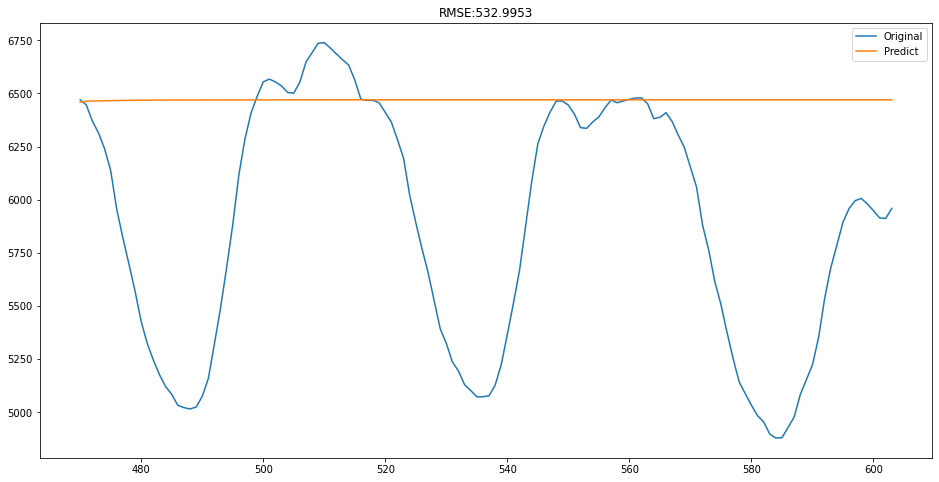

In [69]:
print(val_df)
MA_predict = results_MA.predict(start = val_df.index[0],end=val_df.index[-1] )
MA_predict1 = pd.Series((np.ones(val_df.shape[0])*(val_df['NEM Demand(Actual)'].iloc[0])),index = val_df.index)
MA_predict1 = MA_predict1.add(MA_predict, fill_value = 0)
MA_predict = MA_predict1 
print(MA_predict)


plt.plot(val_df['NEM Demand(Actual)'], label= 'Original')
plt.plot(MA_predict, label = 'Predict')
plt.legend(loc ='best' )
plt.title('RMSE:%.4f'%(np.sqrt(np.dot(MA_predict, val_df['NEM Demand(Actual)']))/val_df.shape[0]))
plt.show()

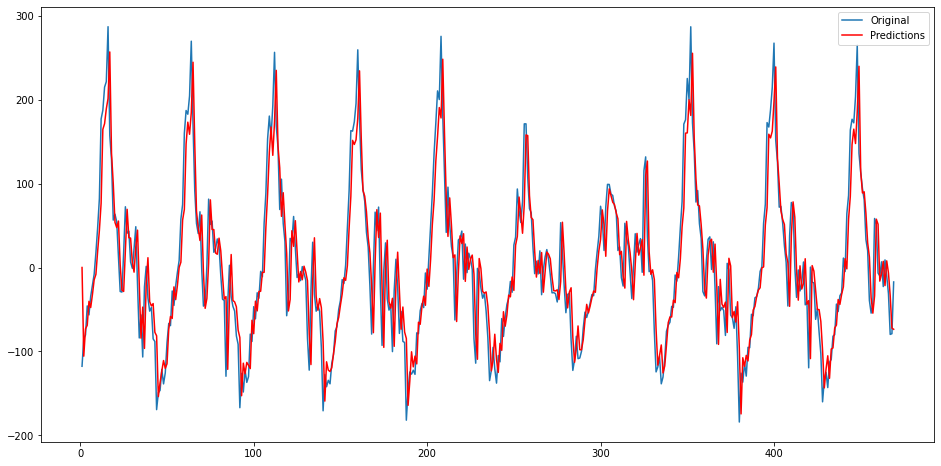

                              ARIMA Model Results                               
Dep. Variable:     D.NEM Demand(Actual)   No. Observations:                  469
Model:                   ARIMA(2, 1, 2)   Log Likelihood               -2402.817
Method:                         css-mle   S.D. of innovations             40.550
Date:                  Tue, 05 Jan 2021   AIC                           4817.635
Time:                          11:39:28   BIC                           4842.538
Sample:                               1   HQIC                          4827.433
                                                                                
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.1481     16.573      0.009      0.993     -32.335      32.631
ar.L1.D.NEM Demand(Actual)     0.1370      0.195      0.702      0.

In [70]:
#Train the Model
model = ARIMA(train_df['NEM Demand(Actual)'], order = (2,1,2))
results_ARIMA = model.fit(disp = -1)
plt.plot(train_df2_diff.dropna(),label ='Original' )
plt.plot(results_ARIMA.fittedvalues, color='red', label = 'Predictions')
plt.legend(loc ='best')
plt.show()
print(results_ARIMA.summary())


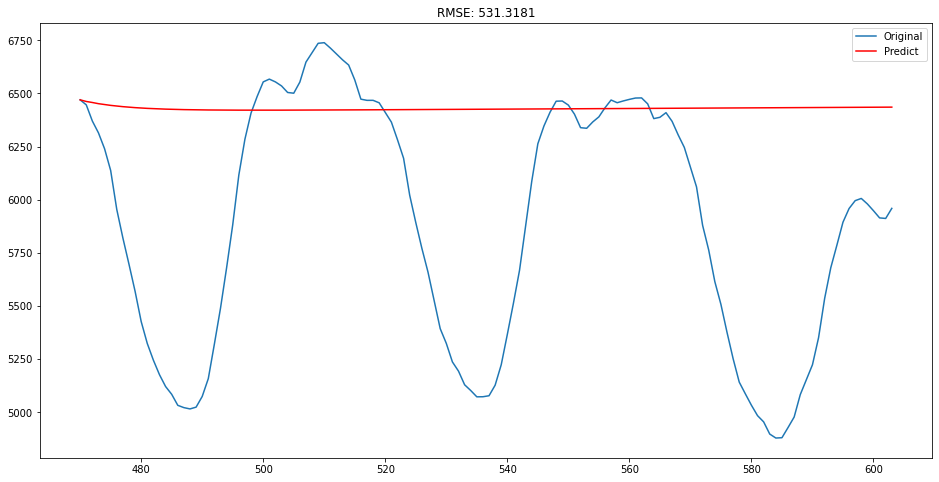

In [71]:
#Predictions using ARIMA model
ARIMA_predict = results_ARIMA.predict(start = val_df.index[0], end =val_df.index[-1])
ARIMA_predict = ARIMA_predict.cumsum().shift().fillna(0)
#Change the scale to original
ARIMA_predict1 = pd.Series(np.ones(val_df.shape[0])*(val_df["NEM Demand(Actual)"].iloc[0]), index = val_df.index)
ARIMA_predict1 = ARIMA_predict1.add(ARIMA_predict, fill_value = 0)
ARIMA_predict =(ARIMA_predict1)
#Plot the ARIMA values

plt.plot(val_df['NEM Demand(Actual)'], label = "Original")
plt.plot(ARIMA_predict, color = 'red', label = "Predict")
plt.legend(loc = 'best')
plt.title('RMSE: %.4f'%(np.sqrt(np.dot(ARIMA_predict, val_df['NEM Demand(Actual)']))/val_df.shape[0]))
plt.show()
